# Is this data fake?

There is a going suspicion that this data is fake. In order to prove that, I will investigate the salaries more in-depth to see what the average salary is by title.

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from config import username, password, host, port
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# connect to local database
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/pewlett_hackard")
conn = engine.connect()

In [4]:
# review tables present in database
engine.table_names()

['employees', 'dept_emp', 'departments', 'dept_manager', 'salaries', 'titles']

In [5]:
# select all the unique titles we expect in our bar graph
pd.read_sql("SELECT DISTINCT title FROM titles ORDER BY title",conn)

,title
0,Assistant Engineer
1,Engineer
2,Manager
3,Senior Engineer
4,Senior Staff
5,Staff
6,Technique Leader


In [6]:
query = """
        SELECT t.emp_no, t.title, s.salary
        FROM employees AS e
        LEFT JOIN titles AS t
            ON e.emp_no=t.emp_no
        LEFT JOIN salaries AS s
            ON e.emp_no=s.emp_no
        
        """
salary_df = pd.read_sql(query,conn)

In [7]:
# what is the row count?
len(salary_df)

443308

In [8]:
salary_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10005,Senior Staff,78228
2,10005,Staff,78228
3,10010,Engineer,72488
4,10011,Staff,42365


Ah ok, the row count is higher than the count of unique employees because employees get promotions and so their title changes. But there's something odd. Employee 10005 has had two roles in the company but his/her salary is unchanged between the two. No salary boost going from Staff to Senior Staff? Blasphemy, I say!

In [9]:
avg_salary = salary_df.groupby("title").agg({"salary":"mean"})
avg_salary

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


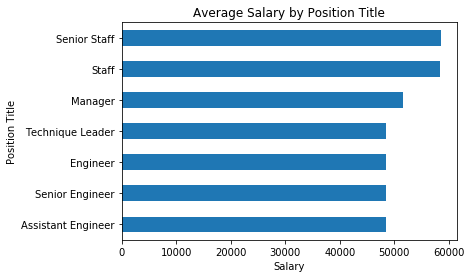

In [10]:
ax = avg_salary.sort_values("salary").plot(kind="barh",legend=None);
ax.set_title("Average Salary by Position Title");
ax.set_xlabel("Salary");
ax.set_ylabel("Position Title");

According to this bar chart, there is very little difference in average salary amongst many of these types of positions. Going from Assistant Engineer -> Engineer -> Senior Engineer and also from Staff -> Senior Staff makes very little difference as there is nearly no pay boost. In fact, Senior Engineers make slightly LESS than more junior engineers!!! In addition, employee salary does not increase at all when they get a promotion according to the table above. It is very clear that this data is FAKE and these employees do not exist!

...wait, what's that about my employee number? It is 499942.

In [11]:
salary_df.query("emp_no == 499942")

,emp_no,title,salary
110780,499942,Technique Leader,40000


😢😢😢